In [1]:
import pandas as pd

In [2]:
#Mount the google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Import Necessary libraries
import os 

# Set Directory path for Dataset
os.chdir("/content/drive/My Drive/")

In [4]:
import pandas as pd
import numpy as np
data = pd.read_csv('/content/drive/My Drive/Final Dataset NEWSPAPERBD.csv',parse_dates=['Publish Date'])

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15565 entries, 0 to 15564
Data columns (total 12 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Url                                 15565 non-null  object
 1   News Paper Name                     15565 non-null  object
 2   Publish Date                        15565 non-null  object
 3   State                               10861 non-null  object
 4   City                                15565 non-null  object
 5   Country                             15565 non-null  object
 6   Headline of the article in Bengali  15565 non-null  object
 7   Headline of the article in English  15565 non-null  object
 8   Text of the Article                 15545 non-null  object
 9   Summarry of the Article             15438 non-null  object
 10  Category                            15565 non-null  object
 11  Sub-category                        11903 non-null  ob

In [6]:
df = pd.DataFrame()

# Object to DateTime

In [7]:
date = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vRgp9C0SR0c6q6QUcPhYoPo1HGLhCKX3sXvS2nl5xHgPt_L4PORr4Qj2xYEVRGTCS6F-zClG09c8ExG/pub?output=csv',parse_dates=['dates'])
date

,raw Date,Publish Date,dates,time
0,2020-05-13 13:28:15+06:00,2020-05-13 13:28:15,2020-05-13,13:28:15
1,2020-05-13 00:00:00+06:00,2020-05-13 0:00:00,2020-05-13,0:00:00
2,2020-05-13 00:00:00+06:00,2020-05-13 0:00:00,2020-05-13,0:00:00
3,2020-05-12 23:00:04+06:00,2020-05-12 23:00:04,2020-05-12,23:00:04
4,2020-05-12 21:27:34+06:00,2020-05-12 21:27:34,2020-05-12,21:27:34
...,...,...,...,...
15560,2020-01-28 2:00:00,2020-01-28 2:00:00,2020-01-28,2:00:00
15561,2020-01-27 20:34:00,2020-01-27 20:34:00,2020-01-27,20:34:00
15562,2020-01-27 18:06:00,2020-01-27 18:06:00,2020-01-27,18:06:00
15563,2020-01-26 18:01:00,2020-01-26 18:01:00,2020-01-26,18:01:00


In [8]:
date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15565 entries, 0 to 15564
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   raw Date      15565 non-null  object        
 1   Publish Date  15565 non-null  object        
 2   dates         15565 non-null  datetime64[ns]
 3   time          15565 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 486.5+ KB


In [9]:
# #df['Date'] = pd.to_datetime(df['Date'], utc=True)
# df['Date'] = pd.to_datetime(date['dates'], dayfirst= False)
df['Date'] = date['dates'].copy()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15565 entries, 0 to 15564
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    15565 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 121.7 KB


In [11]:
df

,Date
0,2020-05-13
1,2020-05-13
2,2020-05-13
3,2020-05-12
4,2020-05-12
...,...
15560,2020-01-28
15561,2020-01-27
15562,2020-01-27
15563,2020-01-26


In [12]:
df = df.sort_values(by = 'Date',ignore_index= True)

In [13]:
df['number of news'] = 1          #For counting news

In [14]:
df = df.set_index('Date')

In [15]:
df

,number of news
Date,
2001-11-30,1
2001-11-30,1
2020-01-21,1
2020-01-22,1
2020-01-22,1
...,...
2020-05-19,1
2020-05-19,1
2020-05-19,1


In [16]:
df2 = df.sort_index()

In [17]:
df2 = df2['2020'].copy()

In [18]:
df2[:]

,number of news
Date,
2020-01-21,1
2020-01-22,1
2020-01-22,1
2020-01-25,1
2020-01-25,1
...,...
2020-05-19,1
2020-05-19,1
2020-05-19,1


In [19]:
!pip install stldecompose

# Decomposing with  statsmodels.api

In [20]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline

# the main library has a small set of functionality
from stldecompose import decompose, forecast
from stldecompose.forecast_funcs import (naive,
                                         drift, 
                                         mean, 
                                         seasonal_naive)


%load_ext autoreload
%autoreload 2

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Daily Resampling

In [21]:
obs = (df2
       .resample('D')
       .sum()
       .interpolate('linear'))

obs

,number of news
Date,
2020-01-21,1
2020-01-22,2
2020-01-23,0
2020-01-24,0
2020-01-25,5
...,...
2020-05-15,320
2020-05-16,2017
2020-05-17,48


In [22]:
obs = obs[:-4]

In [23]:
obs.index

DatetimeIndex(['2020-01-21', '2020-01-22', '2020-01-23', '2020-01-24',
               '2020-01-25', '2020-01-26', '2020-01-27', '2020-01-28',
               '2020-01-29', '2020-01-30',
               ...
               '2020-05-06', '2020-05-07', '2020-05-08', '2020-05-09',
               '2020-05-10', '2020-05-11', '2020-05-12', '2020-05-13',
               '2020-05-14', '2020-05-15'],
              dtype='datetime64[ns]', name='Date', length=116, freq='D')

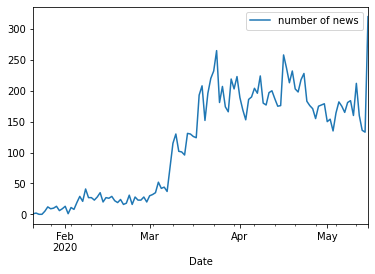

In [24]:
obs.plot()

In [25]:
decomp = decompose(obs, period=7)

decomp

# Decompose Plot

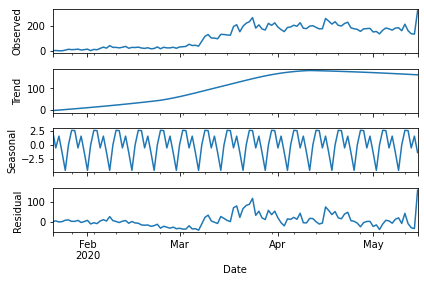

In [26]:
decomp.plot();

# Plotting ovserved,trend, seasonal,residual individually

### Observe

<Figure size 7200x2520 with 0 Axes>

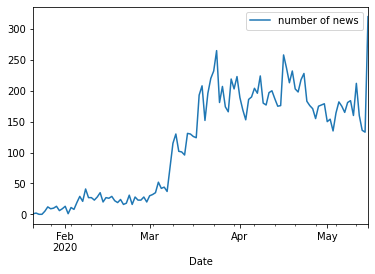

In [27]:
plt.figure(figsize = (100,35))
decomp.observed.plot()

### Trend

<Figure size 7200x2520 with 0 Axes>

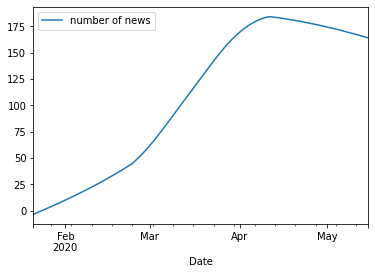

In [28]:
plt.figure(figsize = (100,35))
decomp.trend.plot()

### seasonal

<Figure size 7200x2520 with 0 Axes>

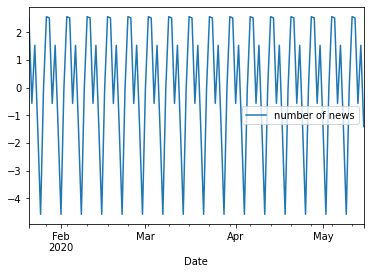

In [29]:
plt.figure(figsize = (100,35))
decomp.seasonal.plot()

### residual

<Figure size 7200x2520 with 0 Axes>

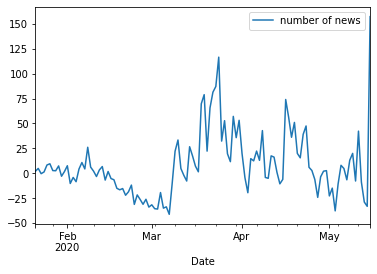

In [30]:
plt.figure(figsize = (100,35))
decomp.resid.plot()

# All plot together

Text(0.5, 0.93, 'Time Series Decomposition')

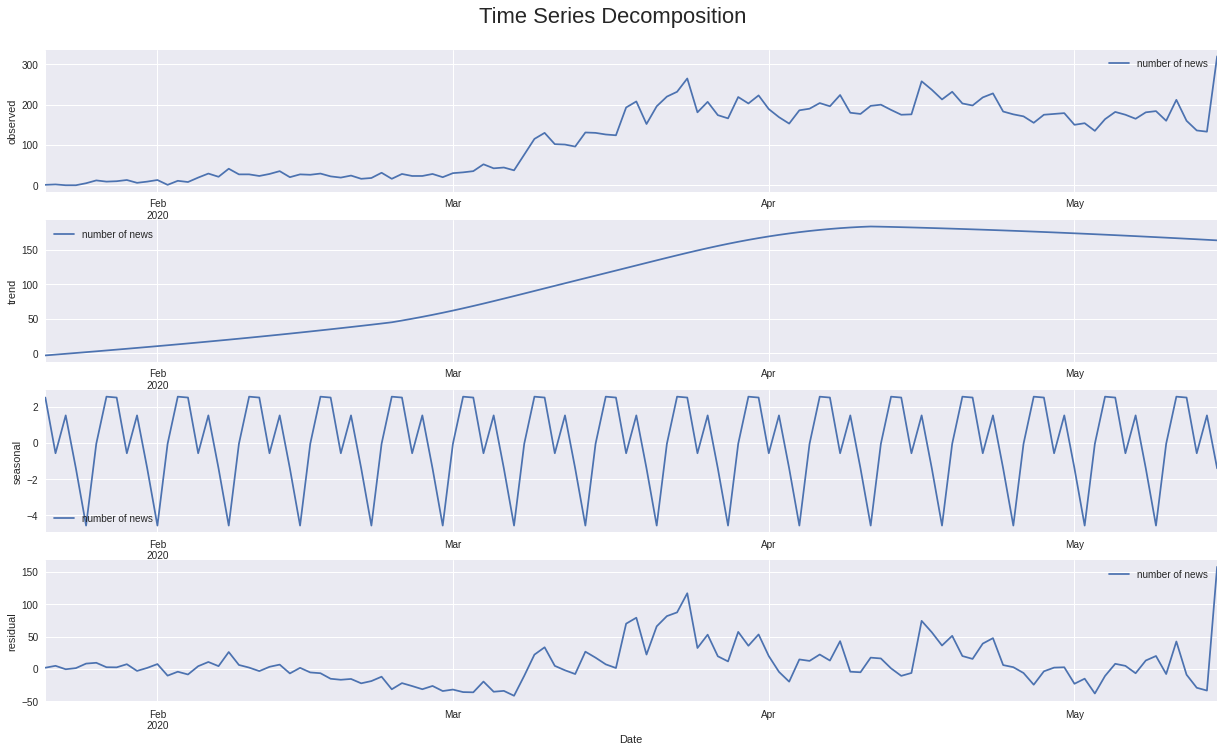

In [31]:
import matplotlib.pyplot as plt 
plt.style.use('seaborn')
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize=(21,12))
decomp.observed.plot(ax=ax1)
ax1.set_ylabel('observed')
decomp.trend.plot(ax=ax2)
ax2.set_ylabel('trend')
decomp.seasonal.plot(ax=ax3)
ax3.set_ylabel('seasonal')
decomp.resid.plot(ax=ax4)
ax4.set_ylabel('residual')
fig.suptitle('Time Series Decomposition', fontsize=22, y=0.93)  
# fig.savefig('Time Series Decomposition.png')

# Decomposing with  statsmodels tsa.seasonal


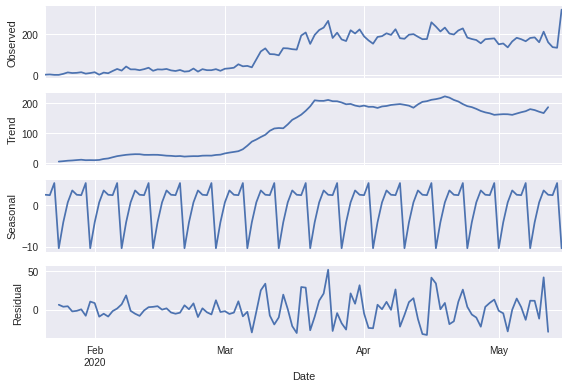

<Figure size 720x360 with 0 Axes>

In [32]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(obs, model='additive',freq = None, two_sided=True, extrapolate_trend=0)
result.plot()
plt.figure(figsize = (10,5))
plt.show()

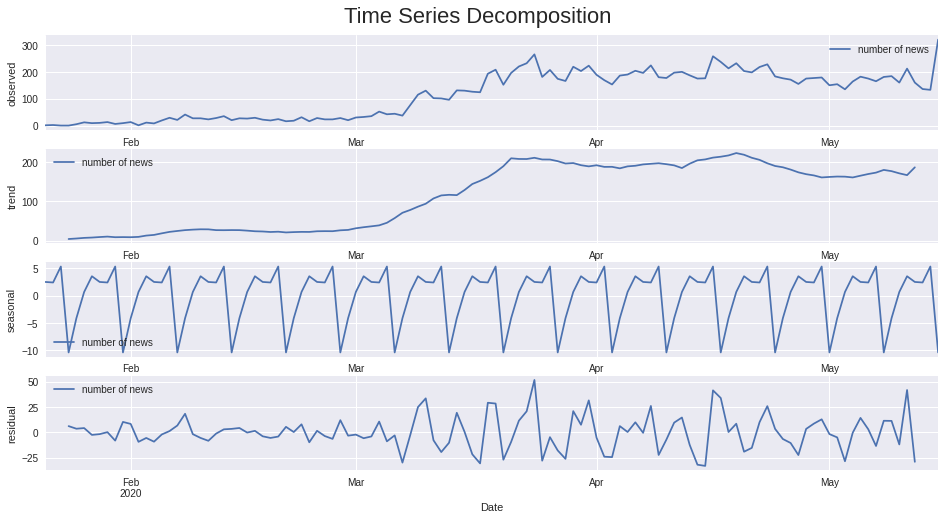

In [33]:
import matplotlib.pyplot as plt 
plt.style.use('seaborn')
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize=(16,8))
result.observed.plot(ax=ax1)
ax1.set_ylabel('observed')
result.trend.plot(ax=ax2)
ax2.set_ylabel('trend')
result.seasonal.plot(ax=ax3)
ax3.set_ylabel('seasonal')
result.resid.plot(ax=ax4)
ax4.set_ylabel('residual')
fig.suptitle('Time Series Decomposition', fontsize=22, y=0.93)  
fig.savefig('Time Series Decomposition.png')

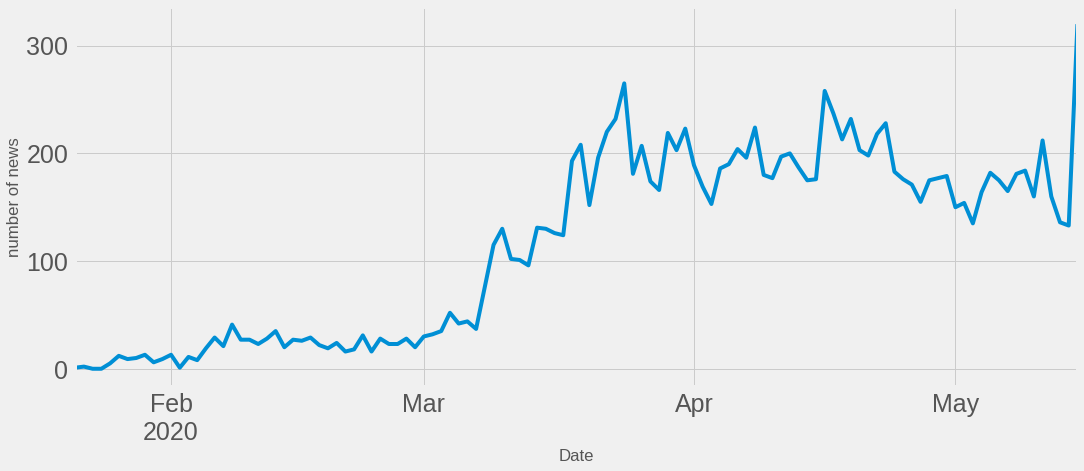

In [116]:
fig, (ax1) = plt.subplots(1,1, figsize=(16,6.5))
result.observed.plot(ax=ax1)
ax1.set_ylabel('number of news')
ax1.tick_params(labelsize=25)
ax1.legend().set_visible(False)
fig.savefig('Observed.pdf', format='pdf', dpi=2400,backend='pgf') 

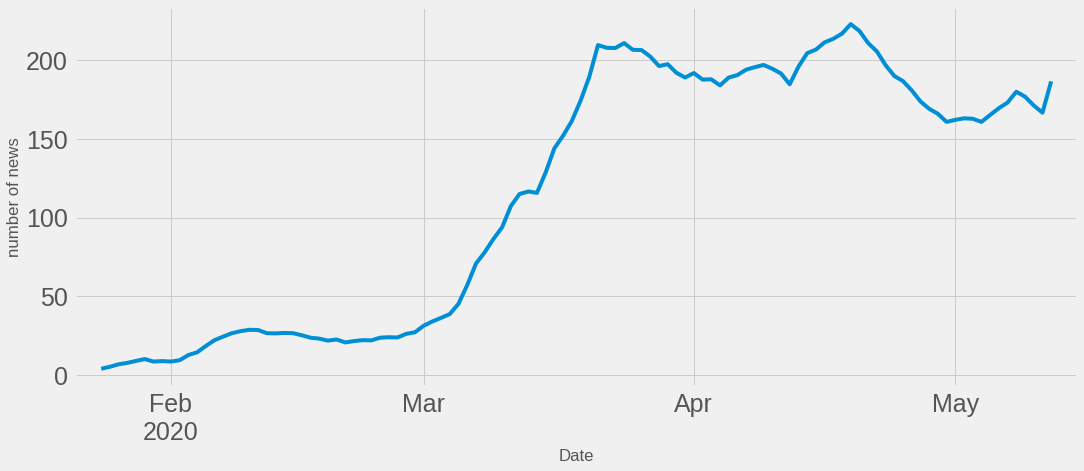

In [117]:
fig, (ax1) = plt.subplots(1,1, figsize=(16,6.5))
result.trend.plot(ax=ax1)
ax1.set_ylabel('number of news')
ax1.tick_params(labelsize=25)
ax1.legend().set_visible(False)
fig.savefig('Trend.pdf', format='pdf', dpi=2400,backend='pgf') 

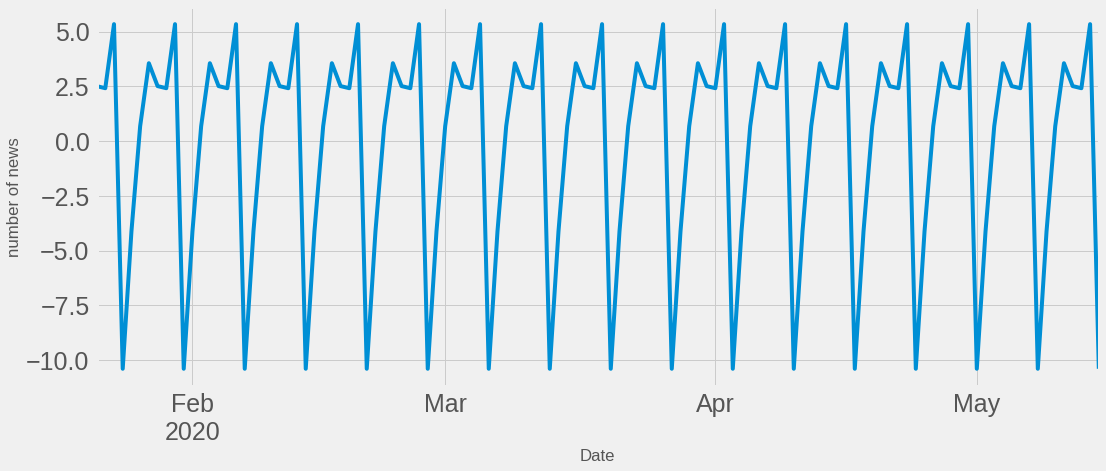

In [118]:
fig, (ax1) = plt.subplots(1,1, figsize=(16,6.5))
result.seasonal.plot(ax=ax1)
ax1.set_ylabel('number of news')
ax1.tick_params(labelsize=25)
ax1.legend().set_visible(False)
fig.savefig('Seasonal.pdf', format='pdf', dpi=2400,backend='pgf') 

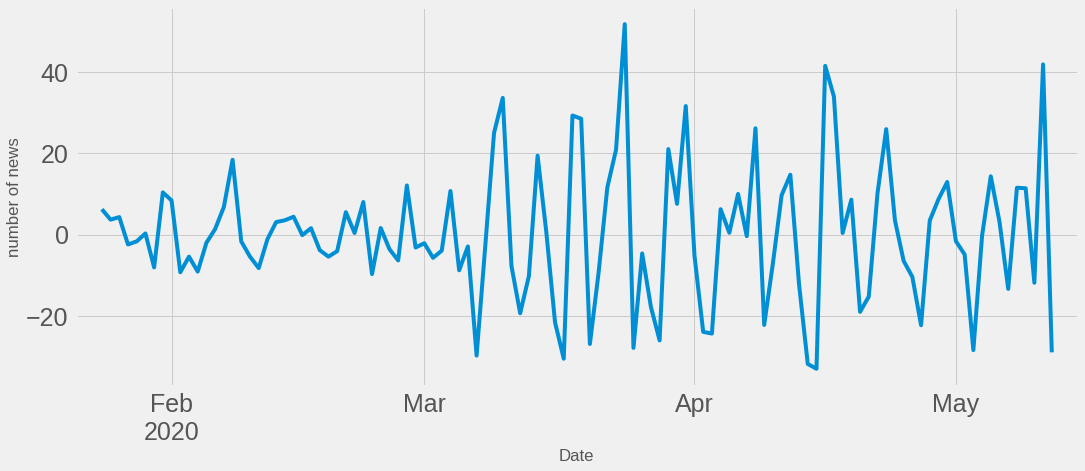

In [119]:
fig, (ax1) = plt.subplots(1,1, figsize=(16,6.5))
result.resid.plot(ax=ax1)
ax1.set_ylabel('number of news')
ax1.tick_params(labelsize=25)
ax1.legend().set_visible(False)
fig.savefig('Residual.pdf', format='pdf', dpi=2400,backend='pgf') 

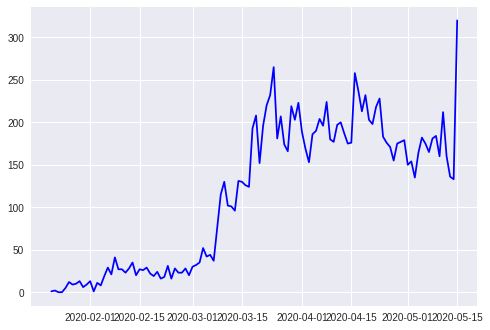

In [38]:
plt.plot(obs.index, obs['number of news'], label='Daily News',color = 'blue')

In [39]:
b1 = pd.read_csv('b1.csv',parse_dates=['Time'])
b2 = pd.read_csv('b2.csv',parse_dates=['Time'])
b3 = pd.read_csv('b3.csv',parse_dates=['Time'])
b4 = pd.read_csv('b4.csv',parse_dates=['Time'])
b5 = pd.read_csv('b5.csv',parse_dates=['Time'])
b6 = pd.read_csv('b6.csv',parse_dates=['Time'])
b7 = pd.read_csv('b7.csv',parse_dates=['Time'])
b8 = pd.read_csv('b8.csv',parse_dates=['Time'])
b9 = pd.read_csv('b9.csv',parse_dates=['Time'])

In [40]:
b2

,Time,District,Division,Country,Bn_Label
0,2020-05-12,Dhaka,Dhaka,Bangladesh,1
1,2020-05-12,Chittagong,Chittagong,Bangladesh,1
2,2020-05-12,Chittagong,Chittagong,Bangladesh,1
3,2020-05-12,Sylhet,Sylhet,Bangladesh,1
4,2020-05-12,Dhaka,Dhaka,Bangladesh,1
...,...,...,...,...,...
1088,2020-03-27,Dhaka,Dhaka,Bangladesh,1
1089,2020-03-21,Dhaka,Dhaka,Bangladesh,1
1090,2020-03-21,Dhaka,Dhaka,Bangladesh,1
1091,2020-03-18,Narayanganj,Dhaka,Bangladesh,1


In [41]:
b2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1093 entries, 0 to 1092
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Time      1093 non-null   datetime64[ns]
 1   District  1093 non-null   object        
 2   Division  1093 non-null   object        
 3   Country   1093 non-null   object        
 4   Bn_Label  1093 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 42.8+ KB


In [42]:
columns = ['District',	'Division',	'Country',	'Bn_Label']
b1.drop(columns, inplace=True, axis=1)
b2.drop(columns, inplace=True, axis=1)
b3.drop(columns, inplace=True, axis=1)
b4.drop(columns, inplace=True, axis=1)
b5.drop(columns, inplace=True, axis=1)
b6.drop(columns, inplace=True, axis=1)
b7.drop(columns, inplace=True, axis=1)
b8.drop(columns, inplace=True, axis=1)
b9.drop(columns, inplace=True, axis=1)

In [43]:
b2

,Time
0,2020-05-12
1,2020-05-12
2,2020-05-12
3,2020-05-12
4,2020-05-12
...,...
1088,2020-03-27
1089,2020-03-21
1090,2020-03-21
1091,2020-03-18


In [44]:
# b1['Time'] = pd.to_datetime(b1['Time'], utc=False,dayfirst = False)
# b2['Time'] = pd.to_datetime(b1['Time'], utc=False,dayfirst = False)
# b3['Time'] = pd.to_datetime(b1['Time'], utc=False,dayfirst = False)
# b4['Time'] = pd.to_datetime(b1['Time'], utc=False,dayfirst = False)
# b5['Time'] = pd.to_datetime(b1['Time'], utc=False,dayfirst = False)
# b6['Time'] = pd.to_datetime(b1['Time'], utc=False,dayfirst = False)
# b7['Time'] = pd.to_datetime(b1['Time'], utc=False,dayfirst = False)
# b8['Time'] = pd.to_datetime(b1['Time'], utc=False,dayfirst = False)
# b9['Time'] = pd.to_datetime(b1['Time'], utc=False,dayfirst = False)

In [45]:
b2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1093 entries, 0 to 1092
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Time    1093 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 8.7 KB


In [46]:
b1['number of news'] = 1          #For counting news
b2['number of news'] = 1
b3['number of news'] = 1
b4['number of news'] = 1
b5['number of news'] = 1
b6['number of news'] = 1
b7['number of news'] = 1
b8['number of news'] = 1
b9['number of news'] = 1

In [47]:
b2

,Time,number of news
0,2020-05-12,1
1,2020-05-12,1
2,2020-05-12,1
3,2020-05-12,1
4,2020-05-12,1
...,...,...
1088,2020-03-27,1
1089,2020-03-21,1
1090,2020-03-21,1
1091,2020-03-18,1


In [48]:
b1 = b1.set_index('Time')
b2 = b2.set_index('Time')
b3 = b3.set_index('Time')
b4 = b4.set_index('Time')
b5 = b5.set_index('Time')
b6 = b6.set_index('Time')
b7 = b7.set_index('Time')
b8 = b8.set_index('Time')
b9 = b9.set_index('Time')

In [49]:
b2

,number of news
Time,
2020-05-12,1
2020-05-12,1
2020-05-12,1
2020-05-12,1
2020-05-12,1
...,...
2020-03-27,1
2020-03-21,1
2020-03-21,1


In [50]:
b1 = b1.sort_index()
b2 = b2.sort_index()
b3 = b3.sort_index()
b4 = b4.sort_index()
b5 = b5.sort_index()
b6 = b6.sort_index()
b7 = b7.sort_index()
b8 = b8.sort_index()
b9 = b9.sort_index()

In [51]:
b1 = b1['2020'].copy()
b2 = b2['2020'].copy()
b3 = b3['2020'].copy()
b4 = b4['2020'].copy()
b5 = b5['2020'].copy()
b6 = b6['2020'].copy()
b7 = b7['2020'].copy()
b8 = b8['2020'].copy()
b9 = b9['2020'].copy()

In [52]:
o1 = (b1.resample('D').sum().interpolate('linear'))
o2 = (b2.resample('D').sum().interpolate('linear'))
o3 = (b3.resample('D').sum().interpolate('linear'))
o4 = (b4.resample('D').sum().interpolate('linear'))
o5 = (b5.resample('D').sum().interpolate('linear'))
o6 = (b6.resample('D').sum().interpolate('linear'))
o7 = (b7.resample('D').sum().interpolate('linear'))
o8 = (b8.resample('D').sum().interpolate('linear'))
o9 = (b9.resample('D').sum().interpolate('linear'))

In [53]:
o1 = o1[:-4]
o2 = o2[:-4]
o3 = o3[:-4]
o4 = o4[:-4]
o5 = o5[:-4]
o6 = o6[:-4]
o7 = o7[:-4]
o8 = o8[:-4]
o9 = o9[:-4]

In [54]:
o2

,number of news
Time,
2020-02-07,1
2020-02-08,0
2020-02-09,0
2020-02-10,0
2020-02-11,0
...,...
2020-05-11,9
2020-05-12,9
2020-05-13,8


In [55]:
o1

,number of news
Time,
2020-02-07,1
2020-02-08,0
2020-02-09,1
2020-02-10,1
2020-02-11,0
...,...
2020-05-11,8
2020-05-12,5
2020-05-13,2


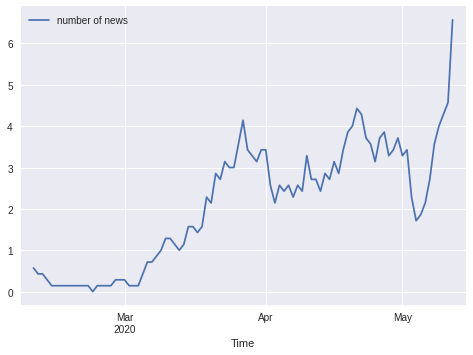

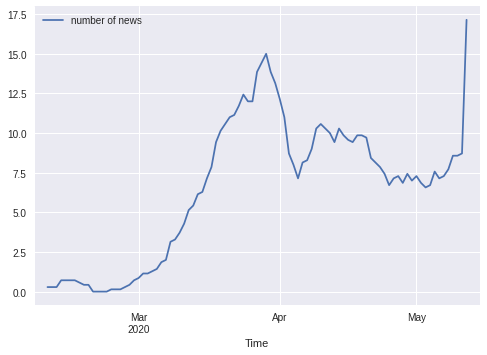

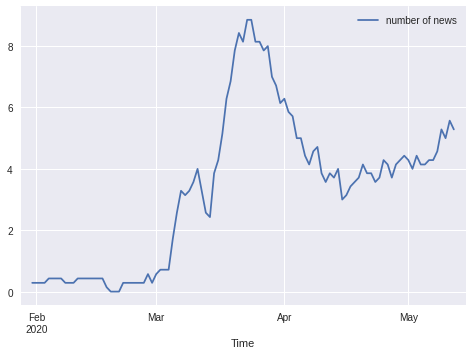

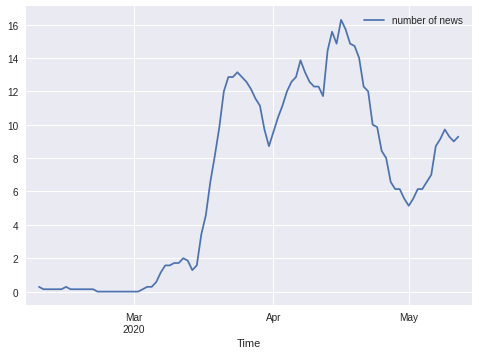

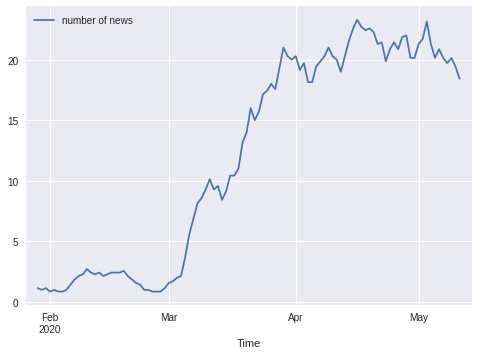

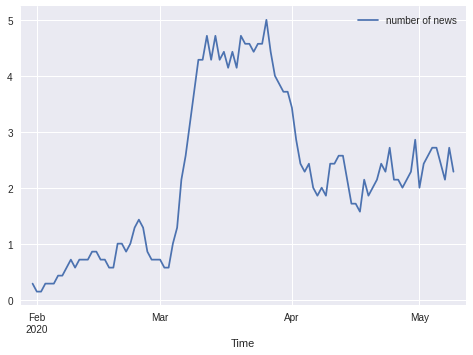

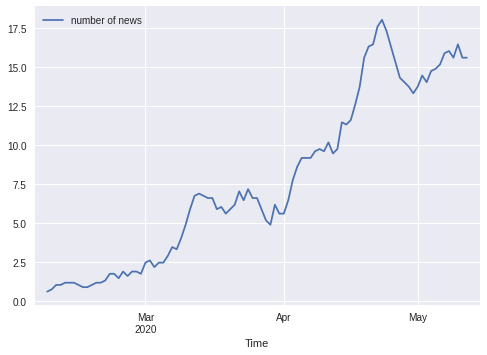

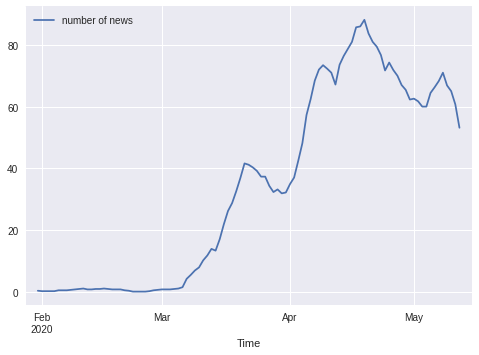

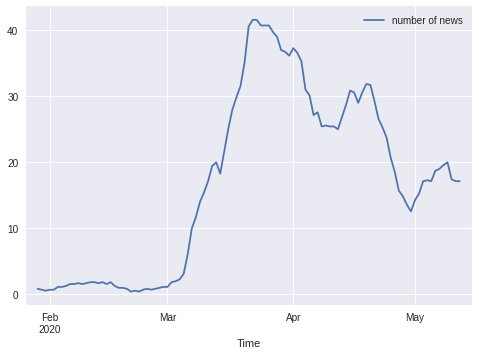

<Figure size 720x360 with 0 Axes>

In [56]:
r1 = seasonal_decompose(o1, model='additive',freq = None, two_sided=True, extrapolate_trend=0)
r2 = seasonal_decompose(o2, model='additive',freq = None, two_sided=True, extrapolate_trend=0)
r3 = seasonal_decompose(o3, model='additive',freq = None, two_sided=True, extrapolate_trend=0)
r4 = seasonal_decompose(o4, model='additive',freq = None, two_sided=True, extrapolate_trend=0)
r5 = seasonal_decompose(o5, model='additive',freq = None, two_sided=True, extrapolate_trend=0)
r6 = seasonal_decompose(o6, model='additive',freq = None, two_sided=True, extrapolate_trend=0)
r7 = seasonal_decompose(o7, model='additive',freq = None, two_sided=True, extrapolate_trend=0)
r8 = seasonal_decompose(o8, model='additive',freq = None, two_sided=True, extrapolate_trend=0)
r9 = seasonal_decompose(o9, model='additive',freq = None, two_sided=True, extrapolate_trend=0)

r1.trend.plot()
r2.trend.plot()
r3.trend.plot()
r4.trend.plot()
r5.trend.plot()
r6.trend.plot()
r7.trend.plot()
r8.trend.plot()
r9.trend.plot()

plt.figure(figsize = (10,5))
plt.show()

In [57]:
topics = ['Economic Crisis & Incentives', 
'Epidemic Situation & Outbreak', 
'Vaccine & Treatment',  
'Demonstration for wages and relief', 
'Medical Care & Health Organization Responses', 
'Repatriation & International Situations', 
'Daily infected,death and recovered cases', 
'Strategic Preparedness', 
'Government Announcement and Responses']
topics

['Economic Crisis & Incentives',
 'Epidemic Situation & Outbreak',
 'Vaccine & Treatment',
 'Demonstration for wages and relief',
 'Medical Care & Health Organization Responses',
 'Repatriation & International Situations',
 'Daily infected,death and recovered cases',
 'Strategic Preparedness',
 'Government Announcement and Responses']

In [66]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

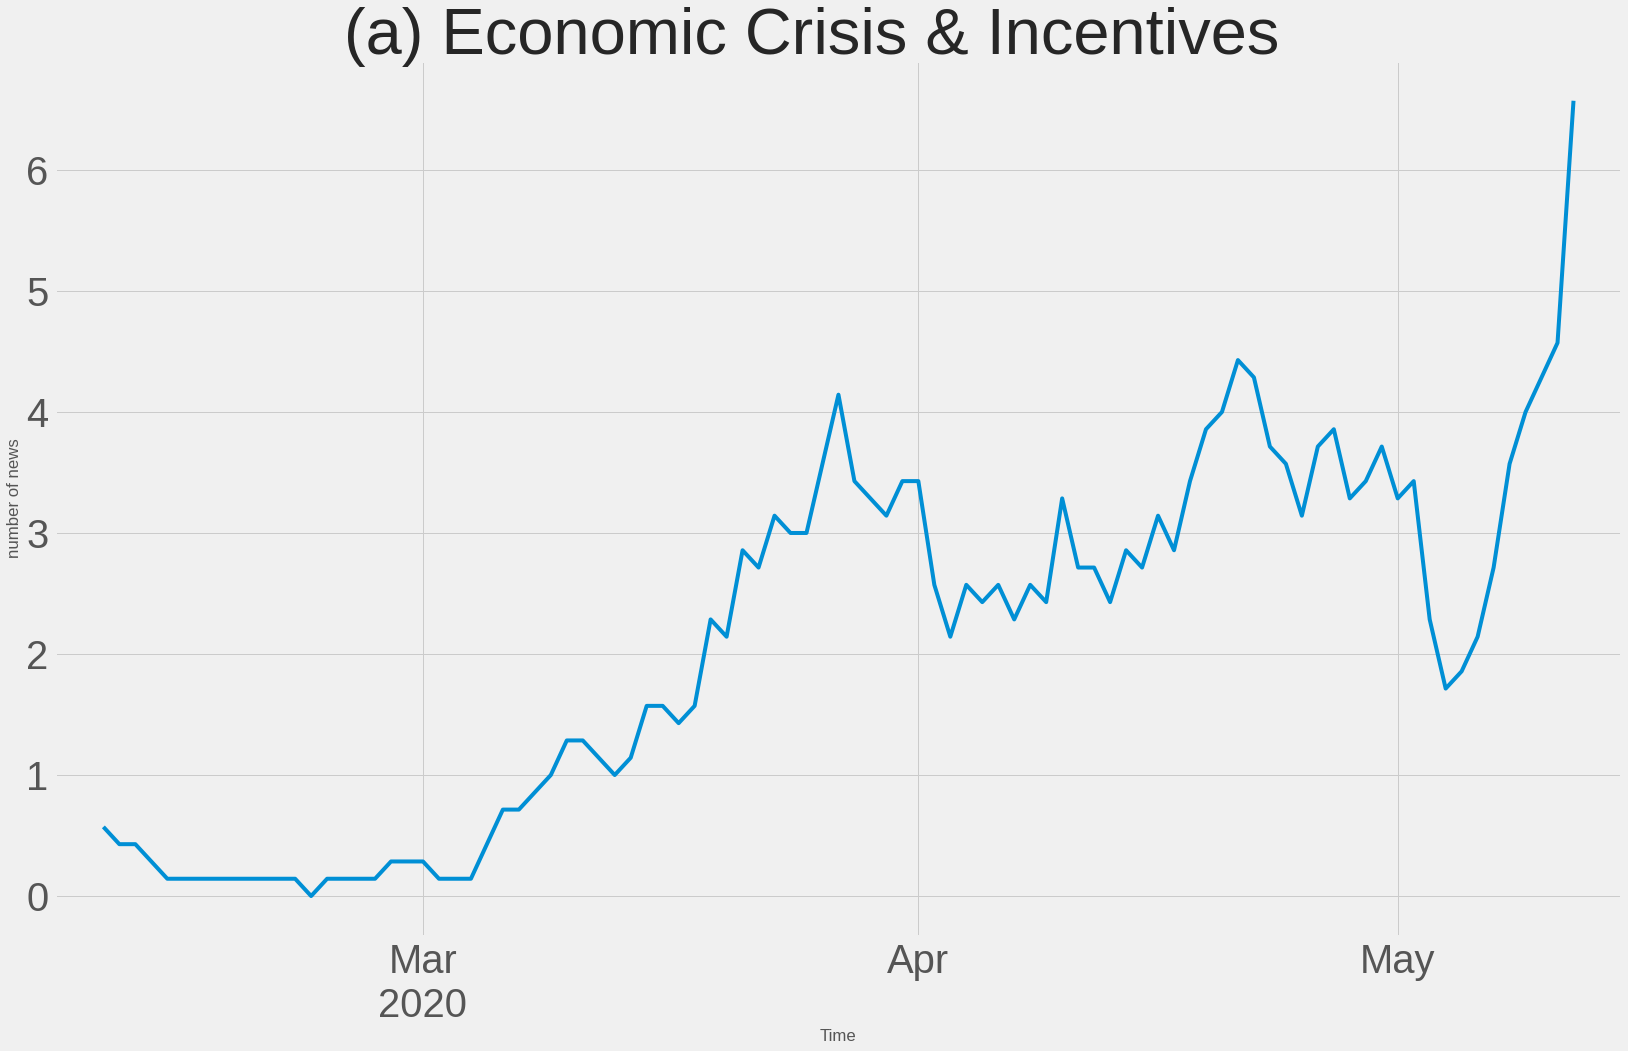

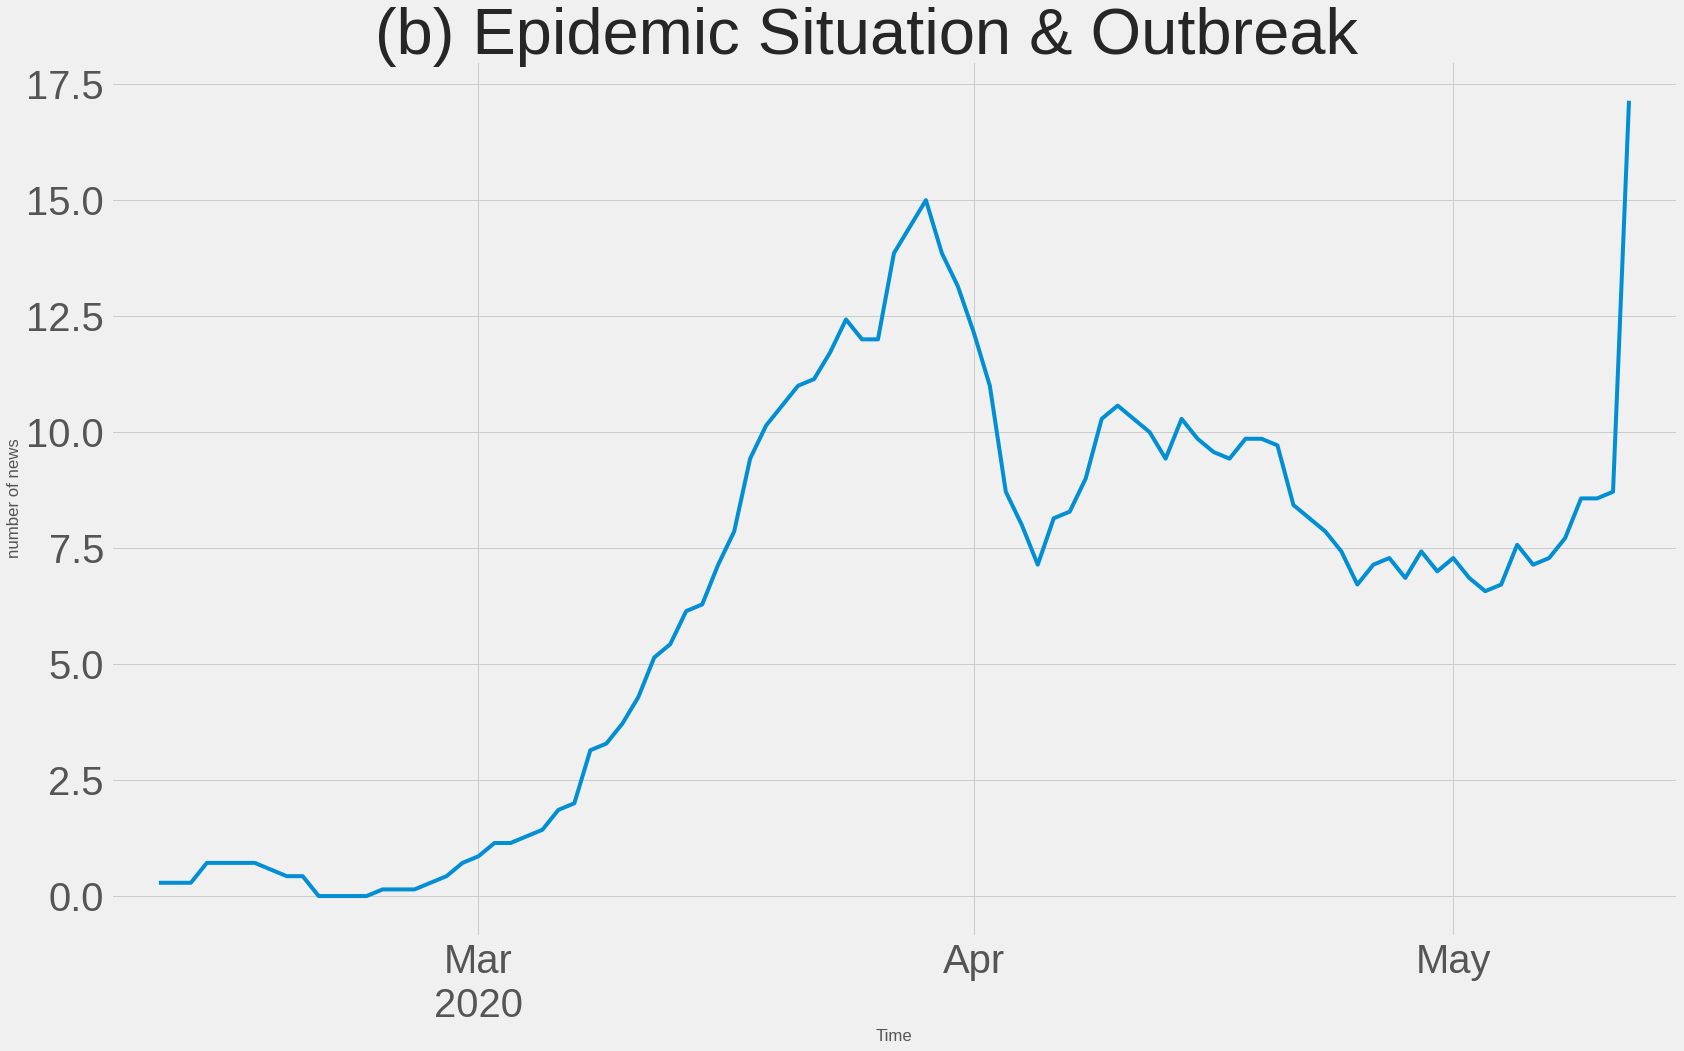

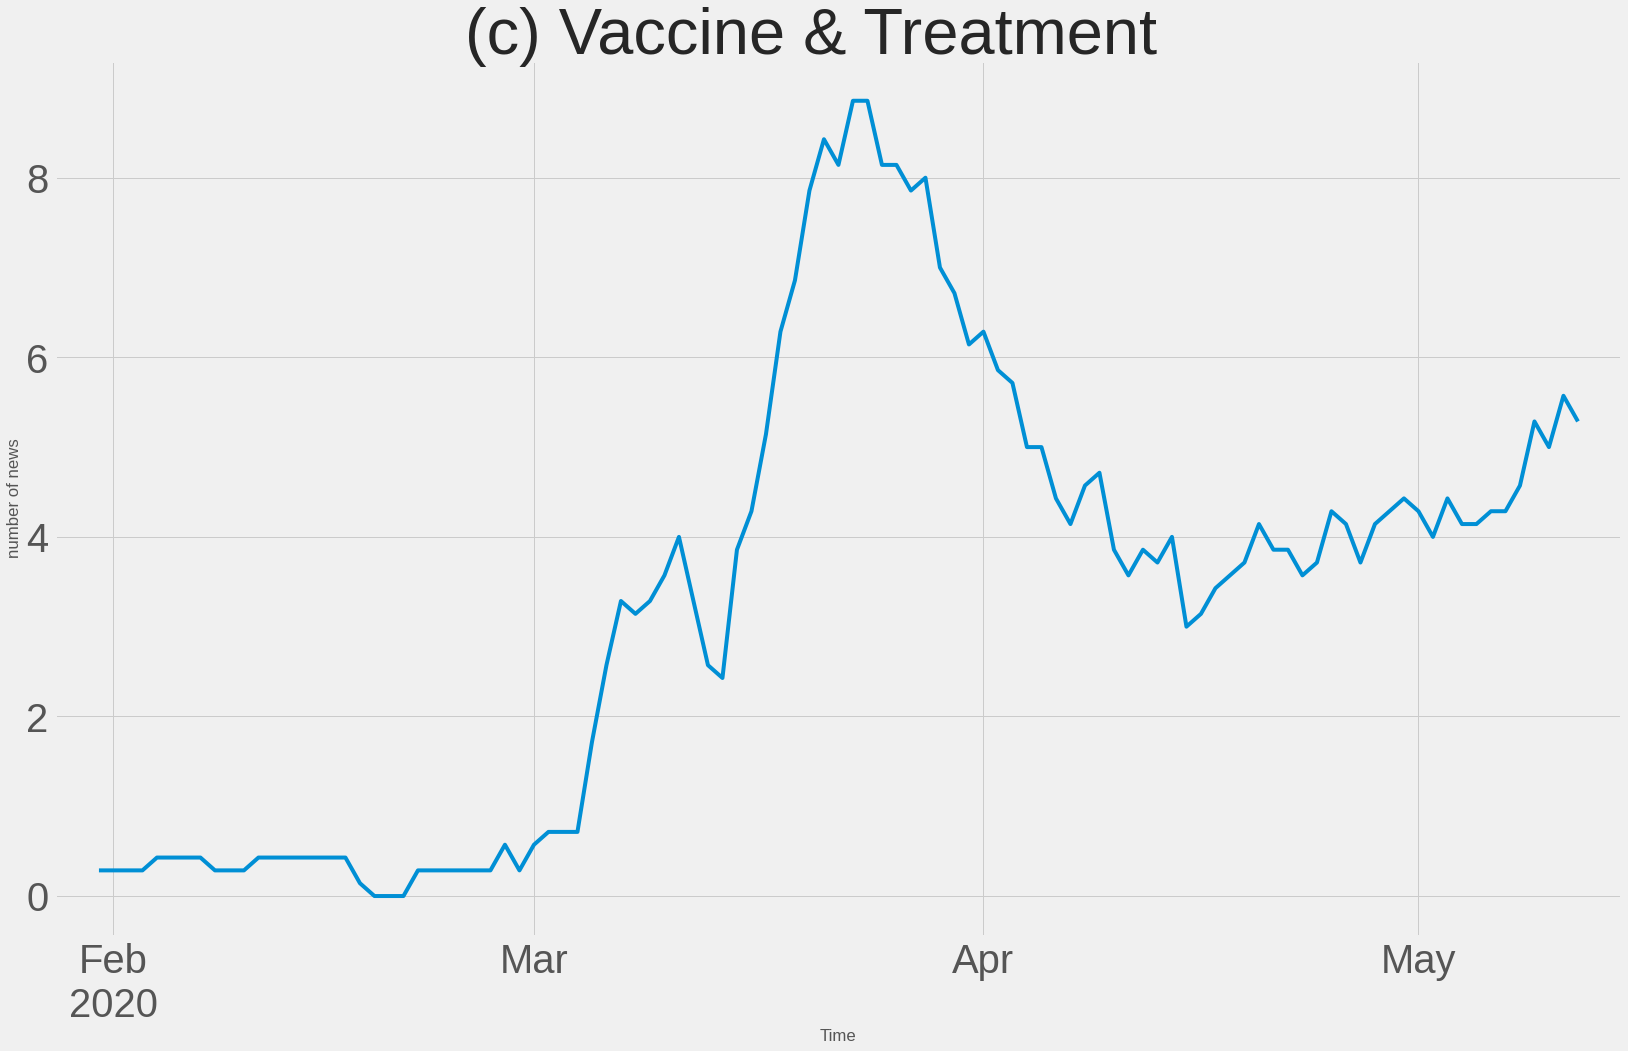

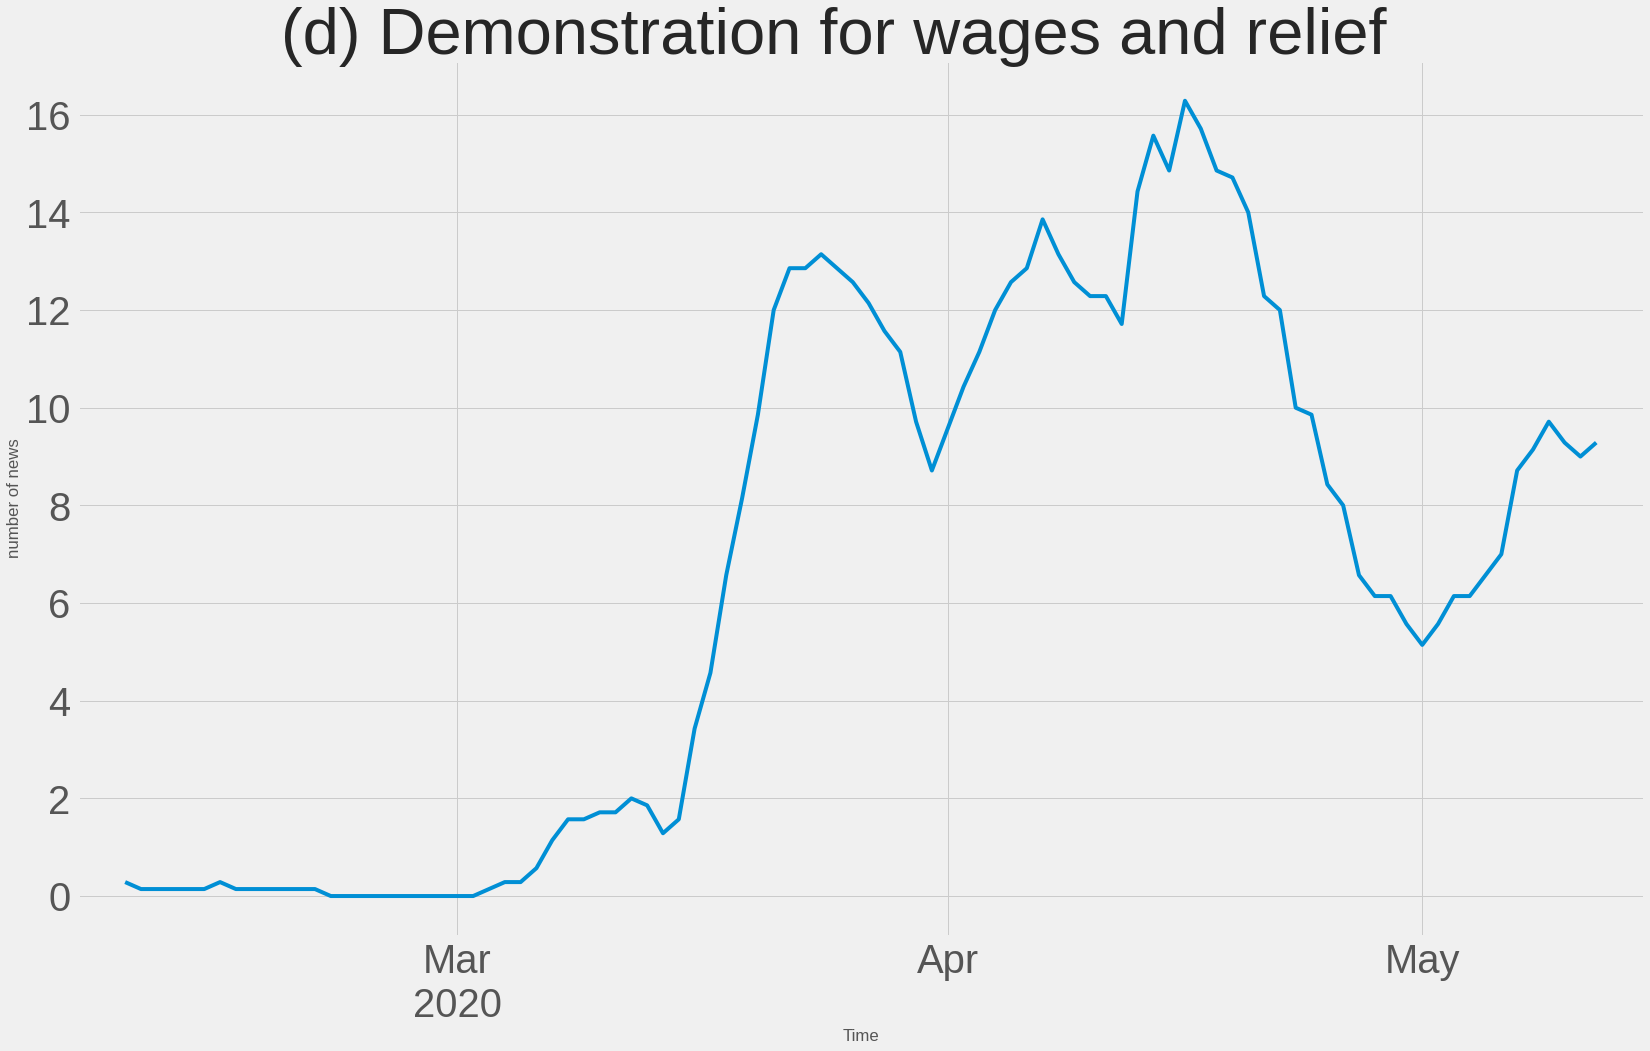

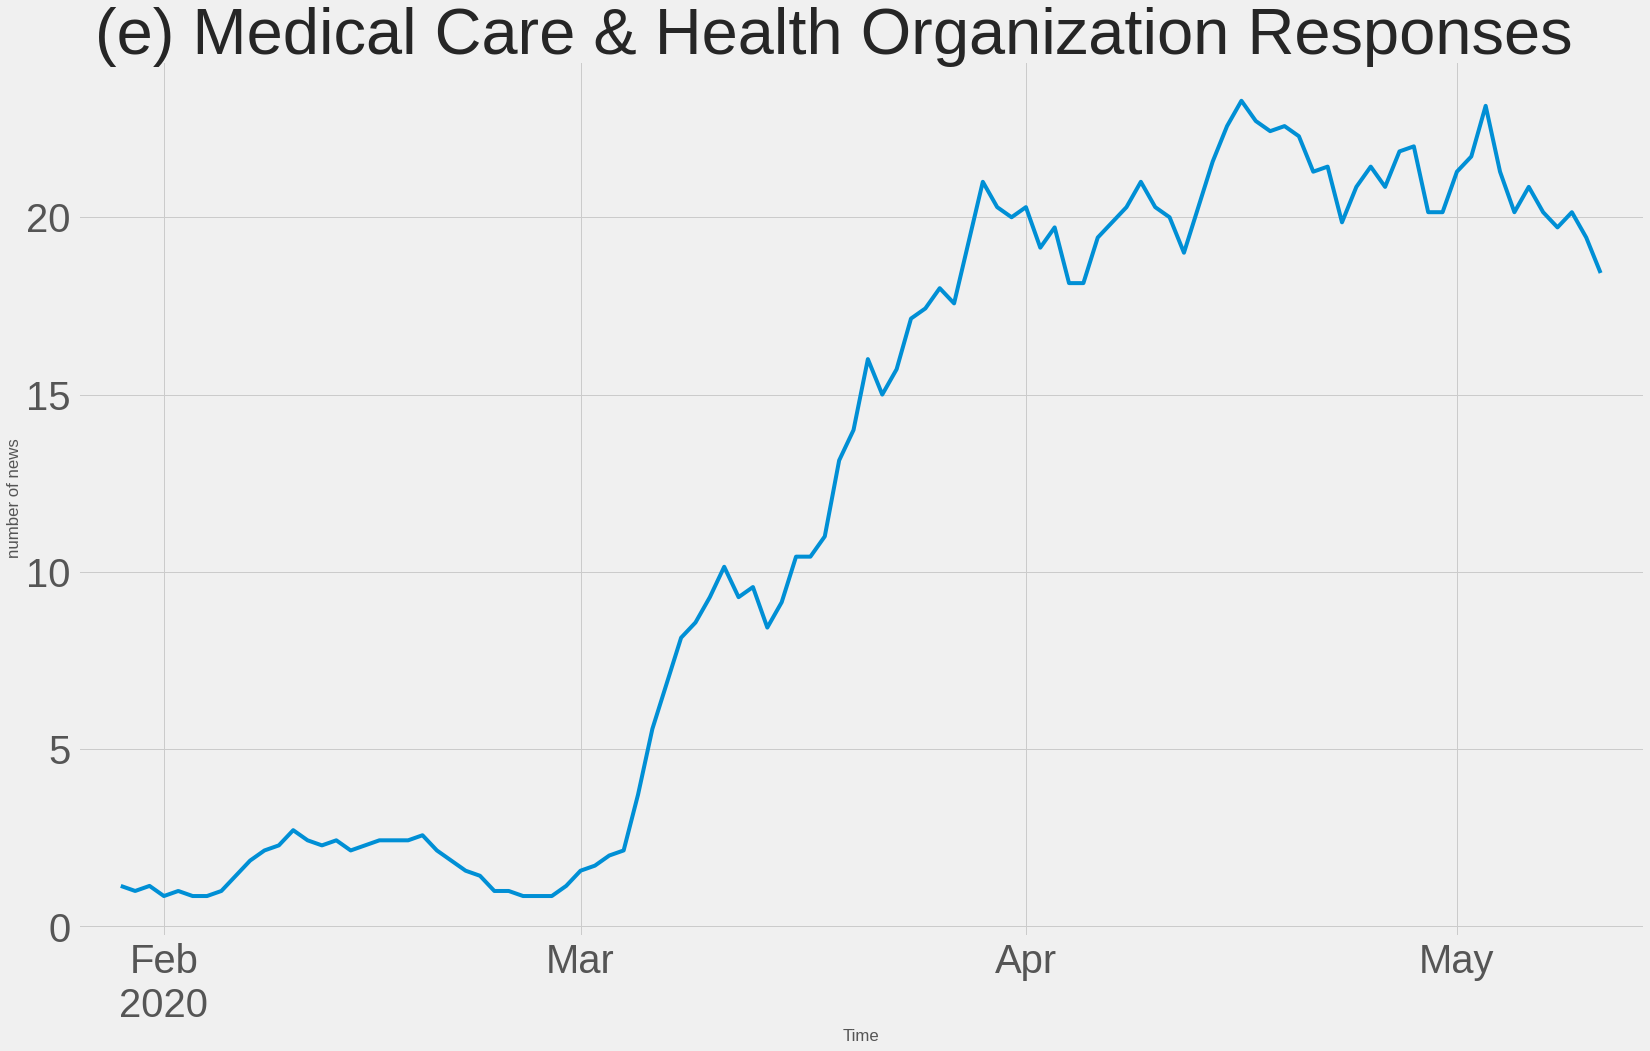

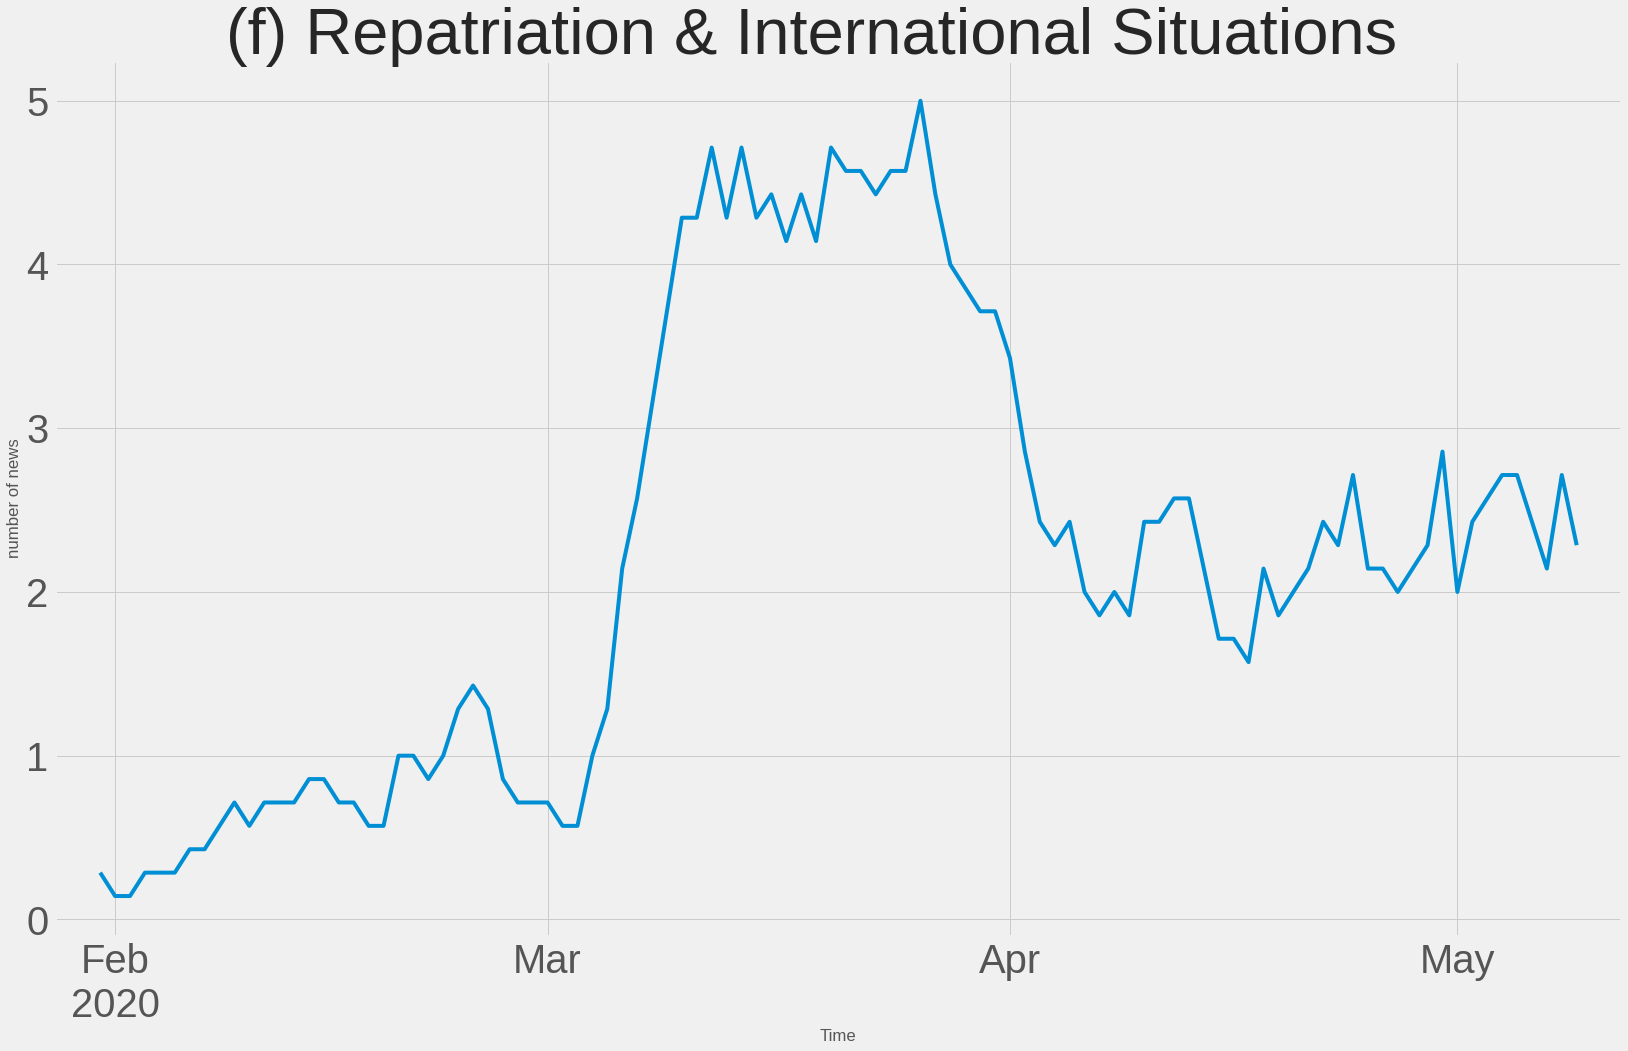

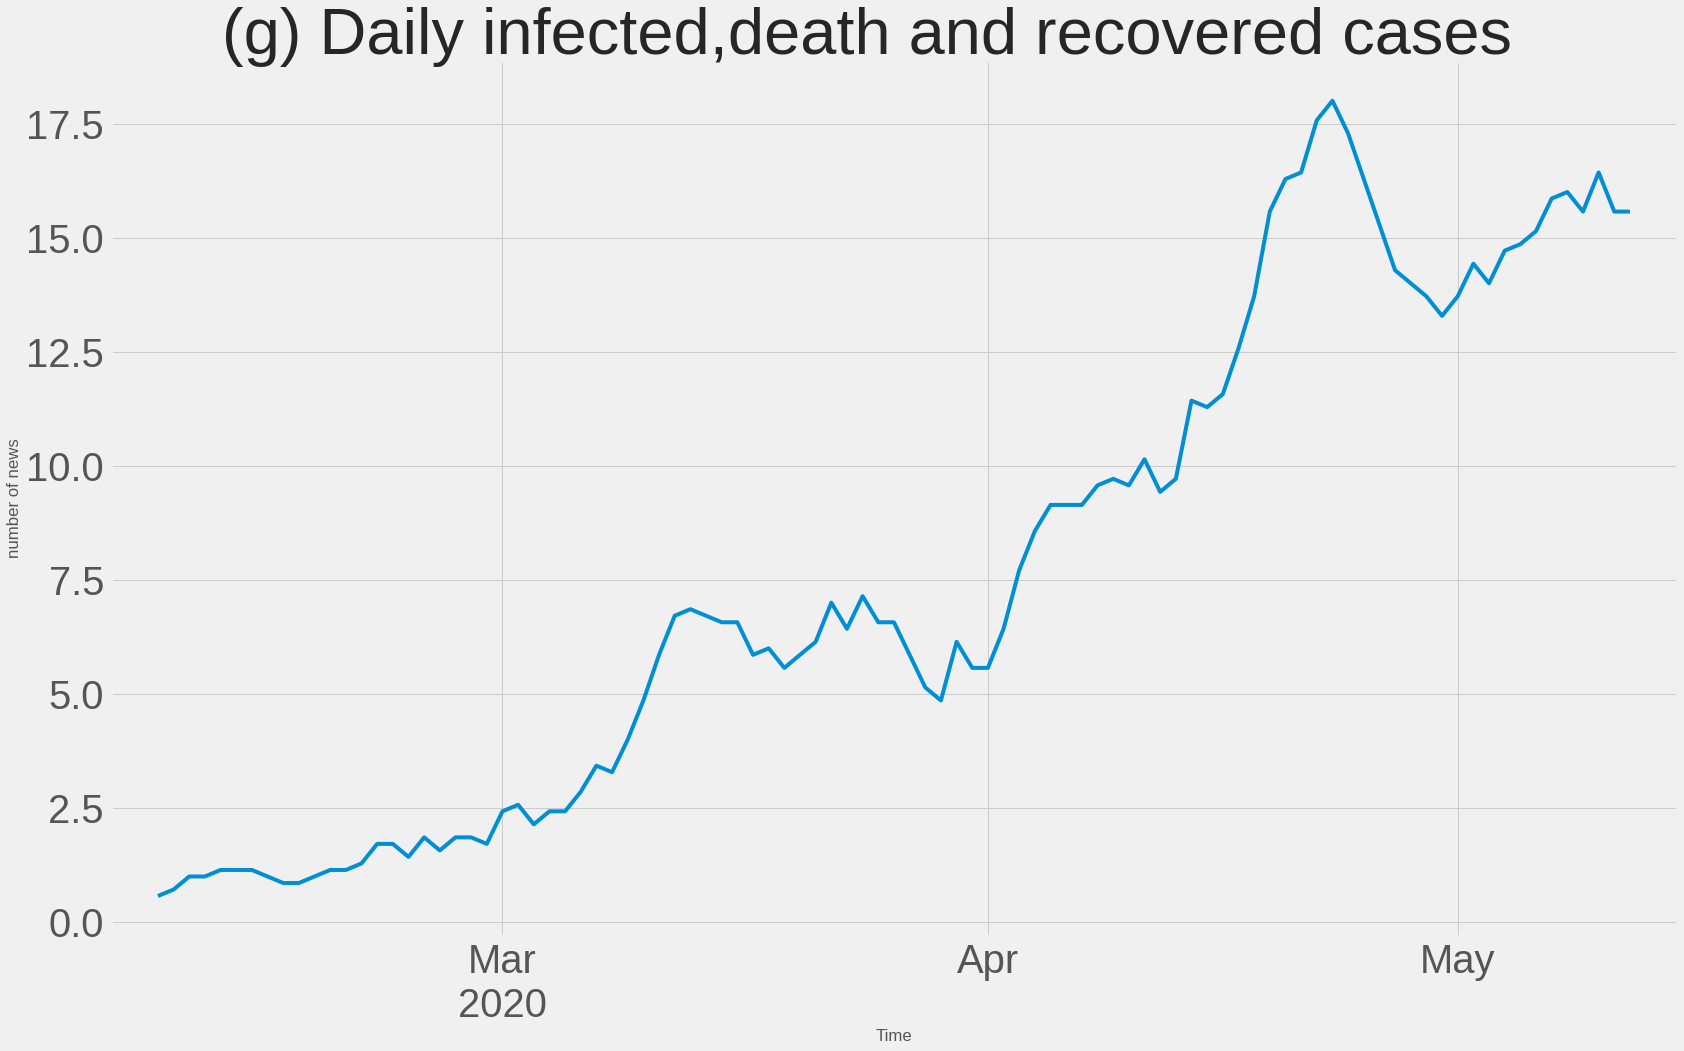

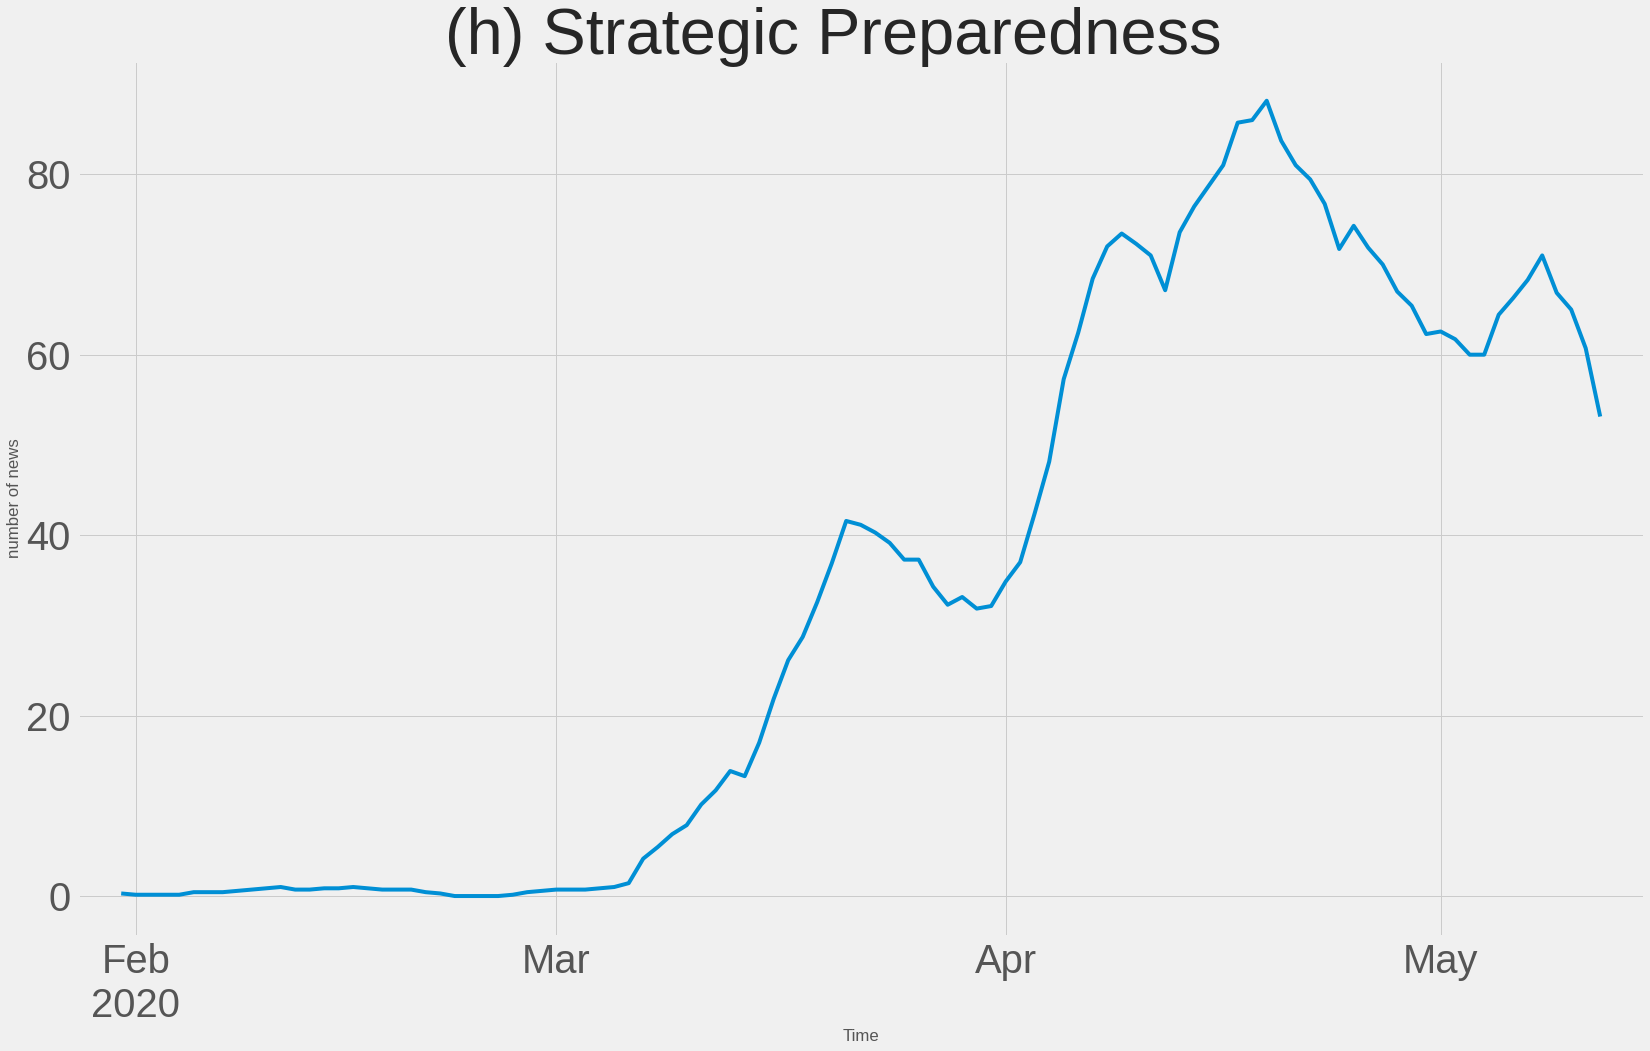

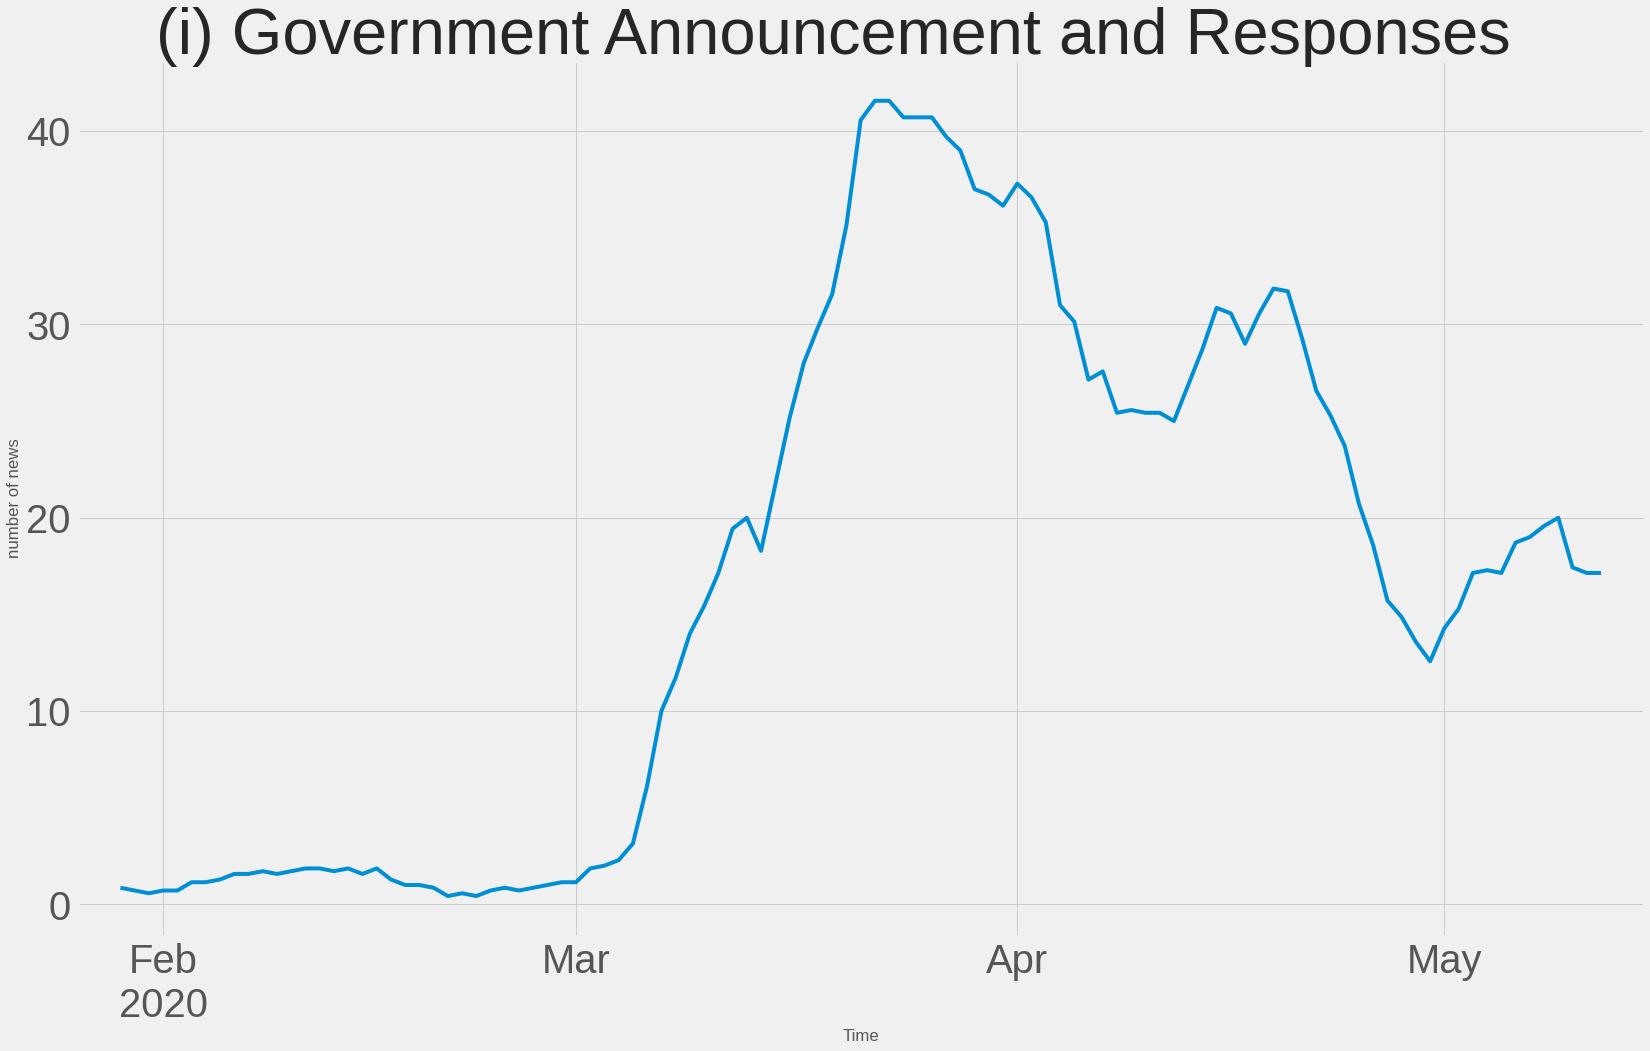

In [148]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
figsize = (25,15)
#Topic 1
fig, (ax1) = plt.subplots(1,1, figsize=figsize)
r1.trend.plot(ax=ax1)
ax1.set_ylabel('number of news')
ax1.tick_params(labelsize=40)
ax1.legend().set_visible(False)
title = '(a) ' + str(topics[0])
fig.suptitle(title, fontsize=65, y=0.93) 
# fig.savefig('tr1.eps', format='eps', dpi=1200) 
# fig.savefig('tr1.png', format='png', dpi=1200) 
fig.savefig('tr1.pdf', format='pdf', dpi=1200,backend='pgf') 



#Topic 2
fig, (ax1) = plt.subplots(1,1, figsize=figsize)
r2.trend.plot(ax=ax1)
ax1.set_ylabel('number of news')
ax1.tick_params(labelsize=40)
ax1.legend().set_visible(False)
title = '(b) ' + str(topics[1])
fig.suptitle(title, fontsize=65, y=0.93) 
# fig.savefig('tr2.eps', format='eps', dpi=1200) 
# fig.savefig('tr2.png', format='png', dpi=1200) 
fig.savefig('tr2.pdf', format='pdf', dpi=1200,backend='pgf') 



#Topic 3
fig, (ax1) = plt.subplots(1,1, figsize=figsize)
r3.trend.plot(ax=ax1)
ax1.set_ylabel('number of news')
ax1.tick_params(labelsize=40)
ax1.legend().set_visible(False)
title = '(c) ' + str(topics[2])
fig.suptitle(title, fontsize=65, y=0.93) 
# fig.savefig('tr3.eps', format='eps', dpi=1200)
# fig.savefig('tr3.png', format='png', dpi=1200) 
fig.savefig('tr3.pdf', format='pdf', dpi=2400,backend='pgf') 



#Topic 4
fig, (ax1) = plt.subplots(1,1, figsize=figsize)
r4.trend.plot(ax=ax1)
ax1.set_ylabel('number of news')
ax1.tick_params(labelsize=40)
ax1.legend().set_visible(False)
title = '(d) ' + str(topics[3])
fig.suptitle(title, fontsize=65, y=0.93) 
# fig.savefig('tr4.eps', format='eps', dpi=1200) 
# fig.savefig('tr4.png', format='png', dpi=1200) 
fig.savefig('tr4.pdf', format='pdf', dpi=2400,backend='pgf') 



#Topic 5
fig, (ax1) = plt.subplots(1,1, figsize=figsize)
r5.trend.plot(ax=ax1)
ax1.set_ylabel('number of news')
ax1.tick_params(labelsize=40)
ax1.legend().set_visible(False)
title = '(e) ' + str(topics[4])
fig.suptitle(title, fontsize=65, y=0.93) 
# fig.savefig('tr5.eps', format='eps', dpi=1200) 
# fig.savefig('tr5.png', format='png', dpi=1200) 
fig.savefig('tr5.pdf', format='pdf', dpi=2400,backend='pgf') 



#Topic 6
fig, (ax1) = plt.subplots(1,1, figsize=figsize)
r6.trend.plot(ax=ax1)
ax1.set_ylabel('number of news')
ax1.tick_params(labelsize=40)
ax1.legend().set_visible(False)
title = '(f) ' + str(topics[5])
fig.suptitle(title, fontsize=65, y=0.93) 
# fig.savefig('tr6.eps', format='eps', dpi=1200)
# fig.savefig('tr6.png', format='png', dpi=1200) 
fig.savefig('tr6.pdf', format='pdf', dpi=2400,backend='pgf') 



#Topic 7
fig, (ax1) = plt.subplots(1,1, figsize=figsize)
r7.trend.plot(ax=ax1)
ax1.set_ylabel('number of news')
ax1.tick_params(labelsize=40)
ax1.legend().set_visible(False)
title = '(g) ' + str(topics[6])
fig.suptitle(title, fontsize=65, y=0.93) 
# fig.savefig('tr7.eps', format='eps', dpi=1200) 
# fig.savefig('tr7.png', format='png', dpi=1200) 
fig.savefig('tr7.pdf', format='pdf', dpi=2400,backend='pgf') 



#Topic 8
fig, (ax1) = plt.subplots(1,1, figsize=figsize)
r8.trend.plot(ax=ax1)
ax1.set_ylabel('number of news')
ax1.tick_params(labelsize=40)
ax1.legend().set_visible(False)
title = '(h) ' + str(topics[7])
fig.suptitle(title, fontsize=65, y=0.93) 
# fig.savefig('tr8.eps', format='eps', dpi=1200) 
# fig.savefig('tr8.png', format='png', dpi=1200) 
fig.savefig('tr8.pdf', format='pdf', dpi=2400,backend='pgf') 



#Topic 9
fig, (ax1) = plt.subplots(1,1, figsize=figsize)
r9.trend.plot(ax=ax1)
ax1.set_ylabel('number of news')
ax1.tick_params(labelsize=40)
ax1.legend().set_visible(False)
title = '(i) ' + str(topics[8])
fig.suptitle(title, fontsize=65, y=0.93) 
# fig.savefig('tr9.eps', format='eps', dpi=1200) 
# fig.savefig('tr9.png', format='png', dpi=1200) 
fig.savefig('tr9.pdf', format='pdf', dpi=2400,backend='pgf') 





Text(0.5, 0.93, '(b) Epidemic Situation & Outbreak')

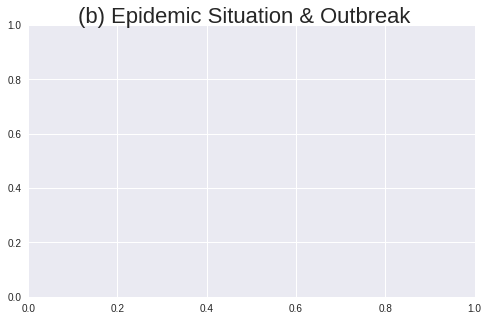

In [59]:
#Topic 2
fig, (ax) = plt.subplots(1,1, figsize=(8,5))
result.trend.plot(ax=ax1)
ax2.set_ylabel('trend')
title = '(b) ' + str(topics[1])
fig.suptitle(title, fontsize=22, y=0.93) 


